# Setup

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../..'))) # access sibling directories

from src.python.metrics import performance_metrics, bootstrapped_metrics
from src.python.helpers import log_with_inf_noise_addition, computation_times
from src.python.visualization import plot_approximations

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from sklearn.metrics import roc_auc_score



# Load data

In [2]:
comparison_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', 'BF_approximation_comparison')
bridge_file = '2021_11_16___20_08_BF_approx_comp'
NN_fixed_file = '2022_03_18___17_06_BF_NN_comp'
NN_variable_file = '2022_01_17___17_10_BF_NN_variable_comp'

bridge = pd.read_csv(os.path.join(comparison_folder, bridge_file), sep = " ").reset_index(drop=True)
NN_fixed = pd.read_csv(os.path.join(comparison_folder, NN_fixed_file))
NN_variable = pd.read_csv(os.path.join(comparison_folder, NN_variable_file))

# Calculate performance metrics

In [3]:
n_bootstrap = 100000
names = ['Bridge sampling', 'Non-amortized network', 'Over L & N amortized network']
metrics = ['MAE', 'RMSE', 'ROC AUC', 'Accuracy']

# Calculate performance metrics
perf_metrics = performance_metrics(bridge, NN_fixed, NN_variable, names=names, metrics=metrics)

# Calculate bootstrapped performance metrics
metrics_means, metrics_sds = bootstrapped_metrics(bridge, NN_fixed, NN_variable, 100, names=names, metrics=metrics)

In [4]:
perf_metrics

,MAE,RMSE,ROC AUC,Accuracy
Bridge sampling,0.149260,0.272923,0.947009,0.90
Non-amortized network,0.146214,0.273039,0.942593,0.91
Over L & N amortized network,0.171013,0.304939,0.931353,0.87


In [5]:
metrics_means

,MAE,RMSE,ROC AUC,Accuracy
Bridge sampling,0.148183,0.269020,0.949614,0.9022
Non-amortized network,0.146308,0.270831,0.943989,0.9099
Over L & N amortized network,0.169818,0.300668,0.933554,0.8721


In [6]:
metrics_sds

,MAE,RMSE,ROC AUC,Accuracy
Bridge sampling,0.020651,0.032001,0.022158,0.026214
Non-amortized network,0.021184,0.033256,0.024329,0.026739
Over L & N amortized network,0.024219,0.035892,0.026064,0.028681


In [7]:
# Inspired by simulation-based calibration: 
# Do the average posterior probabilities match the 50/50 prior 
# / the 47/53 proportion in the simulated datasets?

print('True prior probability for m1 = {}'.format(0.5))
print('True proportion in simulated datasets = {}'.format(bridge['true_model'].mean()))
print('Bridge Sampling average m1 probability = {}'.format(bridge['m1_prob'].mean()))
print('NN fixed average m1 probability = {}'.format(NN_fixed['m1_prob'].mean()))
print('NN variable average m1 probability = {}'.format(NN_variable['m1_prob'].mean()))

# TODO: integrate into table 
# --> as deviation from true proportion (=.5)? 
# -> simulated datasets have to be 50/50 first

True prior probability for m1 = 0.5
True proportion in simulated datasets = 0.47
Bridge Sampling average m1 probability = 0.47067605978493654
NN fixed average m1 probability = 0.4652783039957285
NN variable average m1 probability = 0.4993575532734394


In [8]:
# How do the proportions of selected models look like?

print('True proportion = {}'.format(bridge['true_model'].mean()))
print('Bridge Sampling proportion = {}'.format(bridge['selected_model'].mean()))
print('NN fixed proportion = {}'.format(NN_fixed['selected_model'].mean()))
print('NN variable proportion = {}'.format(NN_variable['selected_model'].mean()))

True proportion = 0.47
Bridge Sampling proportion = 0.41
NN fixed proportion = 0.4
NN variable proportion = 0.44


# Plot PMPs & log BFs

In [9]:
# Compute Log BFs

log_bridge_bfs = log_with_inf_noise_addition(bridge)
log_NN_fixed_bfs = log_with_inf_noise_addition(NN_fixed)
log_NN_variable_bfs = log_with_inf_noise_addition(NN_variable)

In [10]:
# Plotting settings

colors = {0:'darkgrey', 1:'black'}
figsize = (5, 5)

## BS vs fixed NN

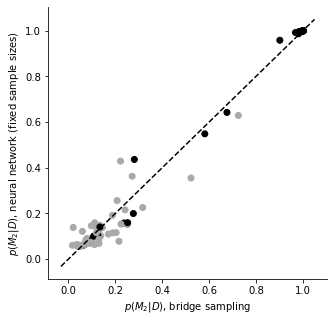

In [11]:
# PMPs
plot_approximations(bridge, NN_fixed, approximated_outcome=0, NN_name='neural network (fixed sample sizes)')

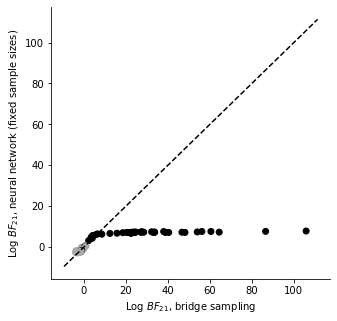

In [12]:
# Log BFs
plot_approximations(bridge, NN_fixed, approximated_outcome=1, NN_name='neural network (fixed sample sizes)')

# Log Bfs with filter
filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_fixed_filtered = NN_fixed[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_fixed_filtered, approximated_outcome=1, NN_name='neural network (fixed sample sizes)')

## BS vs variable NN

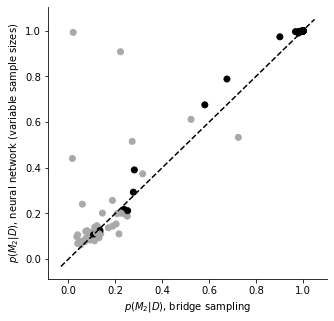

In [13]:
# PMPs
plot_approximations(bridge, NN_variable, approximated_outcome=0, NN_name='neural network (variable sample sizes)')

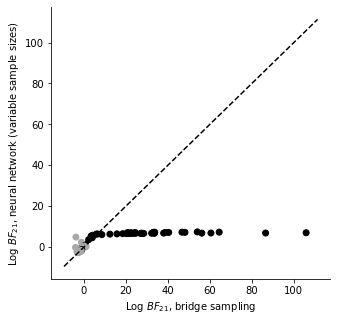

In [14]:
# Log BFs
plot_approximations(bridge, NN_variable, approximated_outcome=1, NN_name='neural network (variable sample sizes)')

# of included datasets: 70


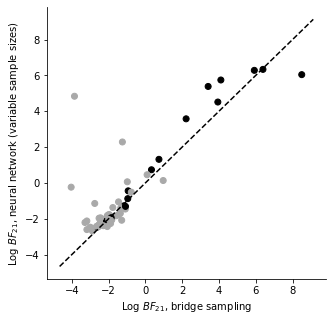

In [15]:
# Log Bfs with filter
filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_variable_filtered = NN_variable[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_variable_filtered, approximated_outcome=1, NN_name='neural network (variable sample sizes)')

# Plot computation time as function of datasets

In [37]:
# Calculate computation times
bridge_time, NN_fixed_time, NN_variable_time = computation_times(bridge, NN_fixed, NN_variable)

In [38]:
# Mean computation times per phase
# Bridge Sampling
print('Stan: {}'.format(np.mean(bridge['stan_time'])))
print('Bridge: {}'.format(np.mean(bridge['bridge_time'])))

# NN fixed
print('NN fixed training: {}'.format(np.mean(NN_fixed['training_time'])))
print('NN fixed inference: {}'.format(np.mean(NN_fixed['inference_time'])))

# NN variable
print('NN variable training: {}'.format(np.mean(NN_variable['training_time'])))
print('NN variable inference: {}'.format(np.mean(NN_variable['inference_time'])))

Stan: 42.01806385755539
Bridge: 28.694869680404665
NN fixed training: 667.8317011
NN fixed inference: 0.016648700002406203
NN variable training: 715.3192054999998
NN variable inference: 0.021643799999765102


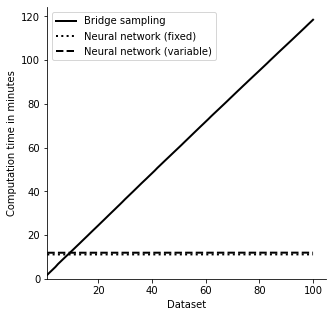

In [43]:
# Plot for all datasets
f, ax = plt.subplots(1, 1, figsize=figsize)
ax.plot(bridge_time, label='Bridge sampling', lw=2, color='black')
ax.plot(NN_fixed_time, label='Neural network (fixed)', lw=2, linestyle='dotted', color='black')
ax.plot(NN_variable_time, label='Neural network (variable)', lw=2, linestyle='dashed', color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Dataset') # add (cumulative)? 
ax.set_ylabel('Computation time in minutes')
ax.set_xlim(xmin=1)
ax.set_ylim(ymin=0)
ax.legend(loc='upper left')
#f.savefig('comp_times_TeaP.png', dpi=300, bbox_inches='tight')

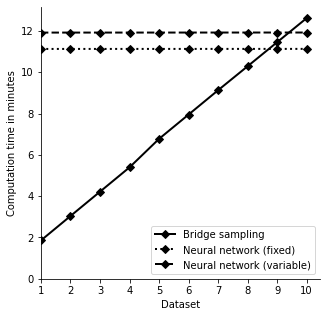

In [44]:
# Compute & plot for first d datasets
d=10
bridge_time_short, NN_fixed_time_short, NN_variable_time_short = computation_times(bridge.iloc[:d,:], NN_fixed.iloc[:d,:], NN_variable.iloc[:d,:])

f, ax = plt.subplots(1, 1, figsize=figsize)
ax.plot(bridge_time_short, label='Bridge sampling', lw=2, marker='D', color='black')
ax.plot(NN_fixed_time_short, label='Neural network (fixed)', lw=2, linestyle='dotted', marker='D', color='black')
ax.plot(NN_variable_time_short, label='Neural network (variable)', lw=2, linestyle='dashed', marker='D', color='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Dataset')
ax.set_ylabel('Computation time in minutes')
ax.set_xticks(bridge_time_short.index) # display ticks for each dataset
ax.set_xlim(xmin=1)
ax.set_ylim(ymin=0)
ax.legend(loc='lower right')
#f.savefig('figures/BF_N_Toy.png', dpi=300, bbox_inches='tight')